In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
cifar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test,Y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 10s 0us/step


In [ ]:
def timer(start_time=None):
  #function to track time 
  if not start_time:
      print(datetime.now())
      start_time = datetime.now()
      return start_time
  elif start_time:
      thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
      tmin, tsec = divmod(temp_sec, 60)
      print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc,color = 'green',label = 'Training Acuracy')
  plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss,color = 'blue',label = 'Training Loss')
  plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

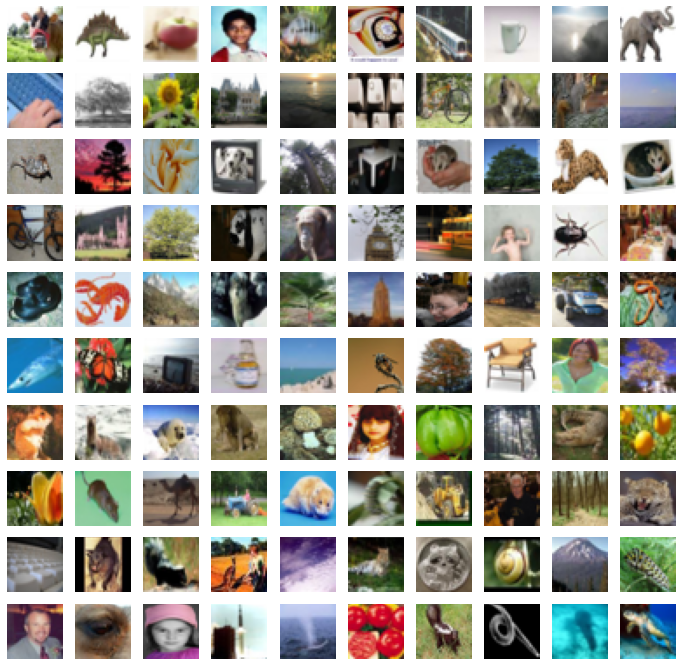

In [ ]:
plt.figure(figsize=(12,12))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i],cmap='gray')

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [ ]:
y_train = to_categorical(y_train, num_classes = 100)
y_val = to_categorical(y_val, num_classes = 100)
y_test = to_categorical(Y_test, num_classes = 100)

In [ ]:
  x_train = x_train * 1.0/255
    
  x_val = x_val * 1.0/255

  X_test = X_test * 1.0/255

In [ ]:
print(x_train.shape, x_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 100) (10000, 100) (10000, 100)


In [ ]:
train_datagen = ImageDataGenerator( 
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1,  
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,  
        vertical_flip = False
        )
train_datagen.fit(x_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.6, 
    min_lr=1e-6)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [ ]:
model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

NameError: ignored

In [ ]:
start_time=timer(None)
result=model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = (x_val, y_val),
    epochs = 50,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)
timer(start_time)

2022-12-05 18:55:10.497574
Epoch 1/50
313/313 [==============================] - 66s 187ms/step - loss: 4.2000 - accuracy: 0.1015 - val_loss: 7.3810 - val_accuracy: 0.0075 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - 56s 180ms/step - loss: 3.0781 - accuracy: 0.2670 - val_loss: 5.7380 - val_accuracy: 0.0135 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - 56s 180ms/step - loss: 2.5865 - accuracy: 0.3618 - val_loss: 3.0890 - val_accuracy: 0.2496 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - 56s 180ms/step - loss: 2.2897 - accuracy: 0.4207 - val_loss: 1.9857 - val_accuracy: 0.4822 - lr: 0.0010
Epoch 5/50
313/313 [==============================] - 56s 180ms/step - loss: 2.0903 - accuracy: 0.4588 - val_loss: 1.8236 - val_accuracy: 0.5202 - lr: 0.0010
Epoch 6/50
313/313 [==============================] - 56s 180ms/step - loss: 1.9380 - accuracy: 0.4915 - val_loss: 1.7293 - val_accuracy: 0.5392 - lr: 0.0010
Epoch 7/50
313/313 [=====

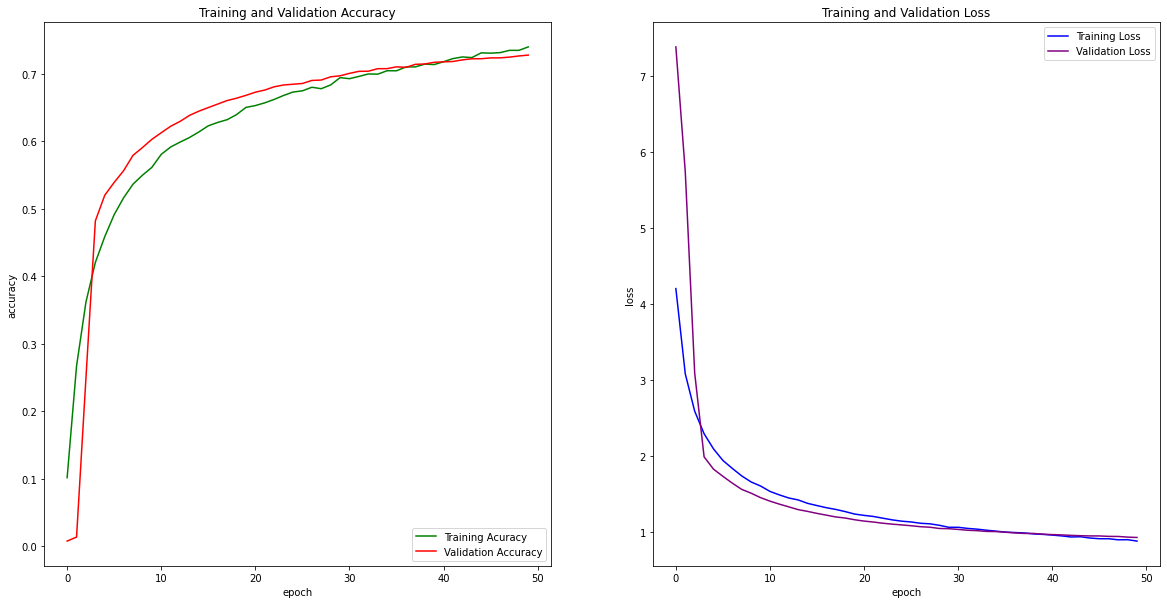

In [ ]:
plot_acc_loss(result)

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = Y_test.ravel()
print(y_pred.shape,y_true.shape)

313/313 [==============================] - 6s 16ms/step
(10000,) (10000,)


In [ ]:
print("Testing Accuracy: ", accuracy_score(y_true,y_pred))

Testing Accuracy:  0.7229


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm)
target = ["Category {}".format(i) for i in range(100)]
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target))

[[82  0  0 ...  0  0  0]
 [ 0 80  1 ...  0  0  0]
 [ 0  1 63 ...  0  5  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  3 ...  0 57  0]
 [ 0  0  0 ...  0  0 81]]
              precision    recall  f1-score   support

  Category 0       0.95      0.82      0.88       100
  Category 1       0.84      0.80      0.82       100
  Category 2       0.61      0.63      0.62       100
  Category 3       0.63      0.49      0.55       100
  Category 4       0.56      0.54      0.55       100
  Category 5       0.75      0.80      0.77       100
  Category 6       0.90      0.74      0.81       100
  Category 7       0.69      0.77      0.73       100
  Category 8       0.76      0.93      0.84       100
  Category 9       0.97      0.87      0.92       100
 Category 10       0.61      0.52      0.56       100
 Category 11       0.46      0.50      0.48       100
 Category 12       0.72      0.79      0.75       100
 Category 13       0.72      0.74      0.73       100
 Category 14       0.53      0.83

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test to test


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving meta to meta


In [ ]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [ ]:
testData = unpickle('test')
metaData = unpickle('meta')

In [ ]:
import pandas as pd
#storing coarse labels along with its number code in a dataframe
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])


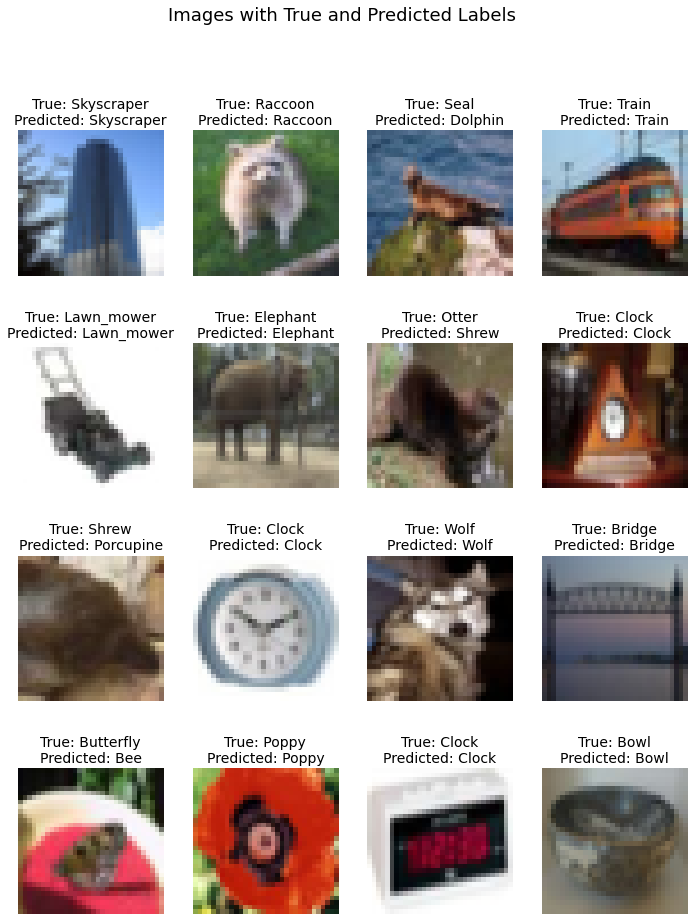

In [ ]:
from pylab import rcParams
prediction = pd.DataFrame(y_pred)
rcParams['figure.figsize'] = 12,15

num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_test), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_test[imageId[k]])
        axes[i,j].set_title("True: " + str(subCategory.iloc[testData['fine_labels'][imageId[k]]][0]).capitalize() + "\nPredicted: " + str(subCategory.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(), fontsize=14)
        axes[i,j].axis('off')
        fig.suptitle("Images with True and Predicted Labels", fontsize=18) 

plt.show()